In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
file_path = "C:/Users/almas/large_dataset_1.csv"

In [3]:
df = dd.read_csv(file_path)

In [4]:
ddf['Value'] = dd.to_numeric(ddf['Value'], errors='coerce')
cleaned_ddf = ddf.dropna(subset=['Value'])

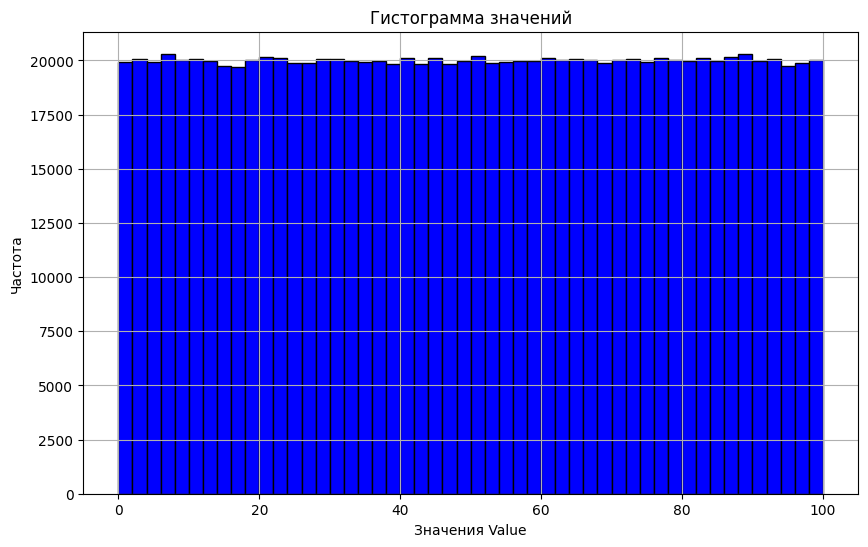

In [5]:
# Вычисление гистограммы
values = cleaned_ddf['Value'].compute()
plt.figure(figsize=(10, 6))
plt.hist(values, bins=50, color='blue', edgecolor='black')
plt.title('Гистограмма значений')
plt.xlabel('Значения Value')
plt.ylabel('Частота')
plt.grid()
plt.show()

In [6]:
# Вычисление 95% доверительного интервала
mean_value = np.mean(values)
std_value = np.std(values, ddof=1)  # Используем ddof=1 для выборочной оценки
n = len(values)

In [7]:
# Вычисление доверительного интервала
confidence_level = 0.95
degrees_freedom = n - 1
confidence_interval = st.t.interval(confidence_level, degrees_freedom, loc=mean_value, scale=std_value / np.sqrt(n))

In [8]:
# Вывод информации о доверительном интервале
print(f"95% доверительный интервал: {confidence_interval}")
print(f"Методика расчета: Использовалась t-распределение для вычисления доверительного интервала среднего значения. "
      f"Так как размер выборки ~ {n} достаточно велик, используется t-распределение, "
      f"что учитывает вариацию и величину выборки.")

95% доверительный интервал: (np.float64(49.952197985398044), np.float64(50.065373858285554))
Методика расчета: Использовалась t-распределение для вычисления доверительного интервала среднего значения. Так как размер выборки ~ 1000000 достаточно велик, используется t-распределение, что учитывает вариацию и величину выборки.
